## Homework 3

<strong>Name: </strong>Kennon Stewart

<strong>Email: </strong>ksstewar@umich.edu

### Question 1

<strong>Question:</strong> Using a little bit of algebra, prove the following: $p(x)=\frac{exp(\beta_{0} + \beta_{1}X)}{1+exp(\beta_{0} + \beta_{1}X)}=\log[\frac{p(x)}{1-p(x)}]=\beta_{0}+\beta_{1}X$.

First, we state the definition that $\log[\frac{p(X)}{1-p(X)}]=\log[p(X)] - \log[1-p(X)]$, which comes from the properties of logarithms. I then replace the values of $p(X)$ with their actual values to give $\log[\frac{p(X)}{1-p(X)}]=\log[\frac{exp(\beta_{0} + \beta_{1}X)}{1+exp(\beta_{0} + \beta_{1}X)}]-\log[1-\frac{exp(\beta_{0} + \beta_{1}X)}{1+exp(\beta_{0} + \beta_{1}X)}]$. I re-write the singular 1 as the ratio of equal values in order to convert the two terms in the second logarithm to one: $\log[\frac{p(X)}{1-p(X)}]=\log[\frac{exp(\beta_{0} + \beta_{1}X)}{1+exp(\beta_{0} + \beta_{1}X)}]-\log[\frac{1+exp(\beta_{0} + \beta_{1}X)}{1+exp(\beta_{0} + \beta_{1}X)}-\frac{exp(\beta_{0} + \beta_{1}X)}{1+exp(\beta_{0} + \beta_{1}X)}]$. As I mentioned, the second logarithm becomes much more manageable as $\log[\frac{p(X)}{1-p(X)}]=\log[exp(\beta_{0}+\beta_{1}X)] - \log[1+exp(\beta_{0}+\beta_{1}X)]-\log[1]+\log[1+exp(\beta_{0}+\beta_{1}X)]$. 

This is simplified to get $\log[\frac{p(X)}{1-p(X)}]=\beta_{0}+\beta_{1}X$.

<p align = center> <strong>Complete Steps:</strong></p>

$$
\log[\frac{p(X)}{1-p(X)}]=\log[p(X)] - \log[1-p(X)] \\ 
\log[\frac{p(X)}{1-p(X)}]=\log[\frac{exp(\beta_{0} + \beta_{1}X)}{1+exp(\beta_{0} + \beta_{1}X)}]-\log[1-\frac{exp(\beta_{0} + \beta_{1}X)}{1+exp(\beta_{0} + \beta_{1}X)}] \\ 
\log[\frac{p(X)}{1-p(X)}]=\log[\frac{exp(\beta_{0} + \beta_{1}X)}{1+exp(\beta_{0} + \beta_{1}X)}]-\log[\frac{1+exp(\beta_{0} + \beta_{1}X)}{1+exp(\beta_{0} + \beta_{1}X)}-\frac{exp(\beta_{0} + \beta_{1}X)}{1+exp(\beta_{0} + \beta_{1}X)}] \\ 
\log[\frac{p(X)}{1-p(X)}]=\log[exp(\beta_{0}+\beta_{1}X)] - \log[1+exp(\beta_{0}+\beta_{1}X)]-\log[1]+\log[1+exp(\beta_{0}+\beta_{1}X)] \\
\log[\frac{p(X)}{1-p(X)}]=\beta_{0}+\beta_{1}X
$$

### Question 2
#### Part A
<strong>Question:</strong> Ommitted for length.

Noting that the predictors are uniformly distributed across the interval $[0,1]$, we can expect that 10% of the observations would be used to make the prediction.

#### Part B
<strong>Question:</strong> Ommitted for length.

Since the area of our unit square is 1, we can expect $0.1\times0.1=0.01$, or 1% of the observations to be used in predicting the response of the newest observation.

#### Part C
<strong>Question:</strong> Ommitted for length.

We can assume that $(0.1)^{100}=1\times10^{99}$, or that an incredibly small portion of our training set would be used to predict the newest observation.

#### Part D
<strong>Question:</strong> Ommitted for length.

I notice that, as the number of parameters increases, we use an increasingly small portion of our training set to predict the response of our newest observation. This can be an issue because the model can uses a very small portion of the sample, meaning it isn't considering the variation that can occur in the responses. I would assume that this produces a less-powerful classifier.

#### Part E
<strong>Question:</strong> Ommitted for length.

The length of each side of an n-dimensional hypercube would be of length $ (0.1)^{1/(n-1)} $, or the $(n-1)$-th root of 0.1 This allows the area of the hypercube to integrate to 1.

### Question 9

#### Part A

<strong>Question: </strong>On average, what % of people with a 0.37 odds of default will actually default on their credit card bills?

On average, the odds of a random variable, X, is equal to $\frac{p(X)}{1-p(X)}$. We can solve for $p(X)$ to get $p(X)=0.27$, which is about 27%. The calculations are below:

$$
odds(X)=\frac{p(X)}{1-p(X)} 
$$
$$
0.37=\frac{p(X)}{1-p(X)} 
$$
$$
0.37 - 0.37p(X) = p(X) 
$$
$$
0.37 = 1.37p(X) 
$$
$$
p(X) = 0.27
$$

#### Part B
<strong>Question: </strong>If an individual has a 16% of defaulting on their credit card bill, what are their odds of default?

We can compute the odds of default easily from the odds to get an odds of 0.19. The calculations are as follows:

$$
\frac{0.16}{1-0.16} = 0.19
$$

### Question 12

#### Part A
What are the log-odds of apples in your model?
#### Part B

#### Part C

In [1]:
# external package import statements
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
# internal package import statements
from constants import *
from modules import *

In [3]:
# import the training and testing data
college_train = pd.read_csv(COLLEGE_TRAIN_PATH)
college_test = pd.read_csv(COLLEGE_TRAIN_PATH)

In [4]:
# split the predictors from the response
X_college_train = college_train.drop(['Name', 'Private'], axis=1)
y_college_train = college_train['Private']

X_college_test = college_test.drop(['Name', 'Private'], axis=1)
y_college_test = college_test['Private']

In [5]:
# initialize the model
model = LogisticRegression(random_state = RANDOM_STATE_SEED)

# fit to the parametmodumodmodumodumoders naively
model.fit(X_college_train, y_college_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=9271999)

In [6]:
# generate response predictions for the test predictors
y_pred = model.predict(X_college_test)

In [7]:
# generate the class probabilities for each of instance of the test set
prediction_probabilities = model.predict_proba(
    X_college_test
)

# calculate the negative log-likelihoods
calculate_nll(prediction_probabilities)

52.33690056586707

In [8]:
simulation_results = simulate_thresholds(
    prediction_probabilities = prediction_probabilities,
    y_test = y_college_test
)

In [9]:
# isolate the false positive rate, true positive rate
fpr, tpr = zip(*simulation_results)

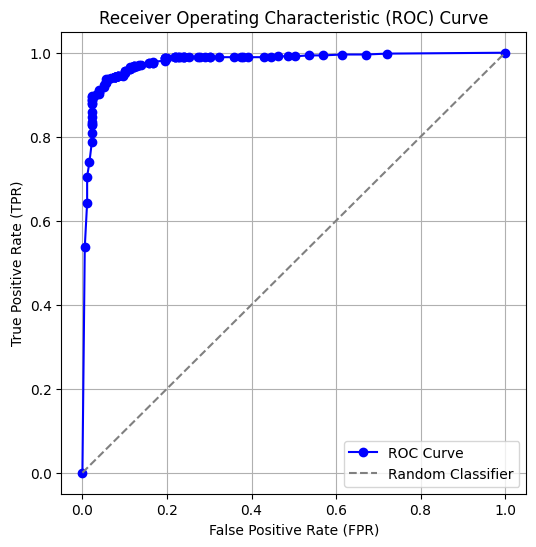

In [10]:
# Plot the ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, marker='o', linestyle='-', color='blue', label=LINE_LABEL)

# Plot the random classifier (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label=RANDOM_CLASSIFIER_LABEL)

# Labels and Title
plt.xlabel(XLABEL)
plt.ylabel(YLABEL)
plt.title(TITLE)
plt.legend()
plt.grid()

# Show plot
plt.show()